In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from skimage.filters import meijering, sato, frangi, hessian
from skimage.measure import label, regionprops, regionprops_table
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
blur0 = !ls cropfigs/*wg04big*_blur0.tif

In [3]:
# stack = np.zeros((166,166))
images = []
for b in blur0:
    img = mpimg.imread(b)
    images.append(img)

In [5]:
hesses = [hessian(img, sigmas=[2, 2]) for img in images]

/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  """Entry point for launching an IPython kernel.


In [6]:
labels = [label(h) for h in hesses]

In [7]:
fracprops = pd.DataFrame()

for l in labels:
    ldf = pd.DataFrame(regionprops_table(l, properties=['label', 'bbox', 'bbox_area', 'convex_area', 'eccentricity', 'filled_area', 'major_axis_length', 'minor_axis_length']))
    fracprops = pd.concat([fracprops, ldf])

In [11]:
# need to drop the label for the empty space
fracprops = fracprops[fracprops.label!=1]

(0.0, 25.0)

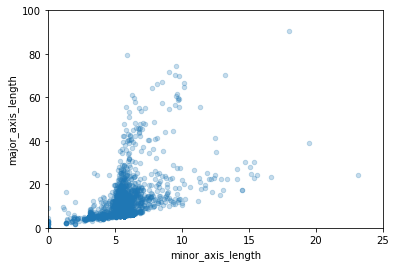

In [17]:
fig, ax = plt.subplots()

fracprops.plot.scatter(y='major_axis_length', x='minor_axis_length', alpha=0.25, ax=ax)

ax.set_ylim(0, 100)
ax.set_xlim(0, 25)

,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,convex_area,eccentricity,filled_area,major_axis_length,minor_axis_length
1,11,160,18,166,42,32,0.613612,30,7.230302,5.709102
2,13,114,23,122,80,53,0.886943,48,11.658987,5.385032
3,14,105,20,113,48,30,0.912665,27,9.581906,3.916196
4,21,158,26,166,40,29,0.906024,25,8.853080,3.746862
5,22,105,28,111,36,32,0.000000,32,6.324555,6.324555
...,...,...,...,...,...,...,...,...,...,...
24,153,21,157,25,16,16,0.000000,16,4.472136,4.472136
25,157,8,166,15,63,44,0.869432,44,10.646563,5.259964
26,157,29,164,35,42,31,0.716521,30,7.366721,5.138772
27,161,36,166,41,25,24,0.408248,24,5.773503,5.270463


In [70]:
# remove the label
X = fracprops[fracprops.columns[5:]]
model = DBSCAN(eps=1, min_samples=25)
clusters = model.fit_predict(StandardScaler().fit_transform(X))

In [71]:
fracprops['dbscan'] = clusters

/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
fracprops.dbscan.unique()

array([ 0,  1,  2,  3,  4, -1,  5,  6])

(0.0, 25.0)

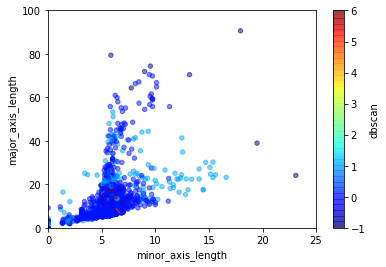

In [74]:
fig, ax = plt.subplots()

fracprops.plot.scatter(y='major_axis_length', x='minor_axis_length', ax=ax, c='dbscan', cmap='jet', alpha=0.5)

ax.set_ylim(0, 100)
ax.set_xlim(0, 25)

In [77]:
fracprops

,label,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,convex_area,eccentricity,filled_area,major_axis_length,minor_axis_length,dbscan
1,2,11,160,18,166,42,32,0.613612,30,7.230302,5.709102,0
2,3,13,114,23,122,80,53,0.886943,48,11.658987,5.385032,0
3,4,14,105,20,113,48,30,0.912665,27,9.581906,3.916196,0
4,5,21,158,26,166,40,29,0.906024,25,8.853080,3.746862,0
5,6,22,105,28,111,36,32,0.000000,32,6.324555,6.324555,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24,25,153,21,157,25,16,16,0.000000,16,4.472136,4.472136,0
25,26,157,8,166,15,63,44,0.869432,44,10.646563,5.259964,0
26,27,157,29,164,35,42,31,0.716521,30,7.366721,5.138772,0
27,28,161,36,166,41,25,24,0.408248,24,5.773503,5.270463,0


In [76]:
fracprops.to_csv('data_for_chastity.csv', index=False)